
[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: yfinance in c:\users\admin\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (0.2.57)



[*********************100%***********************]  1 of 1 completed


Downloaded 1255 days of data for AAPL
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-05-01  70.151215  72.561015  69.369788  69.466858  240616800
2020-05-04  71.143791  71.272411  69.483867  70.175504  133568000
2020-05-05  72.211586  73.046403  71.459279  71.604888  147751200
2020-05-06  72.956596  73.589985  72.529479  72.915338  142333600
2020-05-07  73.711311  74.058348  73.281772  73.585121  115215200

Descriptive Statistics of Daily Returns:
count    1254.000000
mean        0.001055
std         0.018815
min        -0.092456
25%        -0.008212
50%         0.001276
75%         0.011860
max         0.153289
Name: Daily_Return, dtype: float64


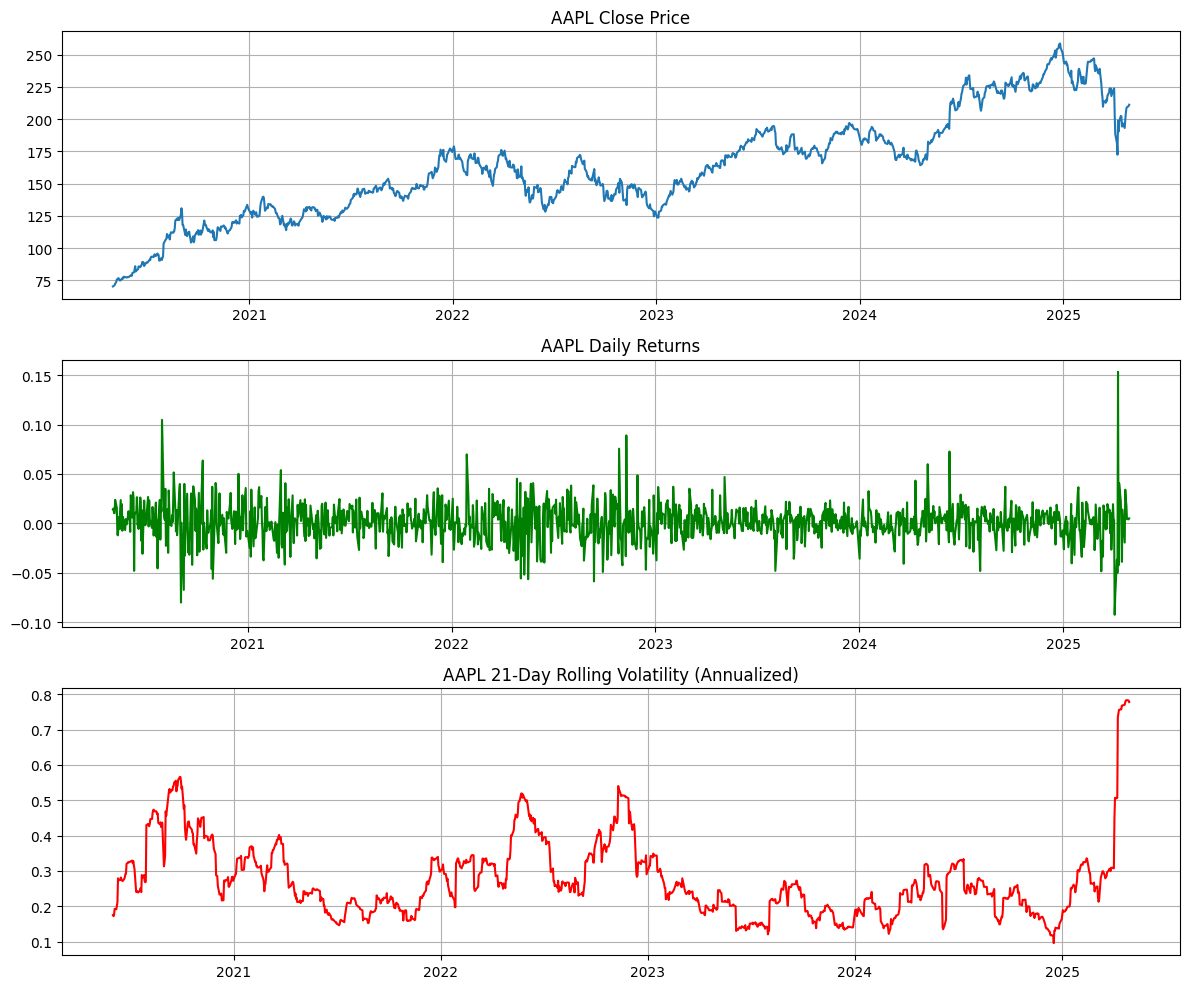

Data exported to AAPL_data.csv


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

# Define the stock ticker symbol and date range
ticker_symbol = "AAPL"  # Apple Inc. as an example
end_date = datetime.now()
start_date = end_date - timedelta(days=365*5)  # 5 years of data

# Download the data
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the first few rows of the data
print(f"Downloaded {len(stock_data)} days of data for {ticker_symbol}")
print(stock_data.head())

# Calculate daily returns using the Close price
stock_data['Daily_Return'] = stock_data[('Close', 'AAPL')].pct_change()

# Basic statistics of returns
print("\nDescriptive Statistics of Daily Returns:")
print(stock_data['Daily_Return'].describe())

# Calculate other useful metrics
stock_data['Log_Return'] = np.log(stock_data[('Close', 'AAPL')] / stock_data[('Close', 'AAPL')].shift(1))
stock_data['Volatility'] = stock_data['Log_Return'].rolling(window=21).std() * np.sqrt(252)  # 21-day rolling volatility, annualized

# Plotting
plt.figure(figsize=(12, 10))

# Price chart
plt.subplot(3, 1, 1)
plt.plot(stock_data[('Close', 'AAPL')])
plt.title(f'{ticker_symbol} Close Price')
plt.grid(True)

# Daily returns
plt.subplot(3, 1, 2)
plt.plot(stock_data['Daily_Return'], color='green')
plt.title(f'{ticker_symbol} Daily Returns')
plt.grid(True)

# Volatility
plt.subplot(3, 1, 3)
plt.plot(stock_data['Volatility'], color='red')
plt.title(f'{ticker_symbol} 21-Day Rolling Volatility (Annualized)')
plt.grid(True)

plt.tight_layout()
plt.savefig(f"{ticker_symbol}_analysis.png")
plt.show()

# If you want to download data for multiple stocks
def download_multiple_stocks(tickers, start_date, end_date):
    """
    Download data for multiple stock tickers
    
    Parameters:
    tickers (list): List of ticker symbols
    start_date, end_date: Start and end dates for the data
    
    Returns:
    dict: Dictionary with ticker symbols as keys and DataFrames as values
    """
    data = {}
    for ticker in tickers:
        print(f"Downloading data for {ticker}...")
        data[ticker] = yf.download(ticker, start=start_date, end=end_date)
    return data

# Example usage for multiple stocks
# stock_tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "META"]
# multi_stock_data = download_multiple_stocks(stock_tickers, start_date, end_date)

# Export data to CSV if needed
stock_data.to_csv(f"{ticker_symbol}_data.csv")
print(f"Data exported to {ticker_symbol}_data.csv")

In [2]:
from scipy.stats import skew, kurtosis, norm
import seaborn as sns

def analyze_return_distribution(returns, title):
    """Analyze statistical properties of returns"""
    # Remove NaN values
    clean_returns = returns.dropna()
    
    # Calculate statistics
    mean = clean_returns.mean()
    std = clean_returns.std()
    annualized_return = mean * 252
    annualized_vol = std * np.sqrt(252)
    skewness = skew(clean_returns)
    kurt = kurtosis(clean_returns)
    
    # Print statistics
    print(f"\n----- {title} -----")
    print(f"Mean daily return: {mean:.6f}")
    print(f"Standard deviation: {std:.6f}")
    print(f"Annualized return: {annualized_return:.4f}")
    print(f"Annualized volatility: {annualized_vol:.4f}")
    print(f"Sharpe ratio (Rf=0): {annualized_return/annualized_vol:.4f}")
    print(f"Skewness: {skewness:.4f}")
    print(f"Excess Kurtosis: {kurt:.4f}")
    
    # Plot histogram with normal distribution overlay
    plt.figure(figsize=(10, 6))
    sns.histplot(clean_returns, kde=True, stat="density", bins=50)
    
    # Add normal distribution curve
    x = np.linspace(clean_returns.min(), clean_returns.max(), 100)
    plt.plot(x, norm.pdf(x, mean, std), 'r-', lw=2, 
             label=f'Normal: μ={mean:.6f}, σ={std:.6f}')
    
    plt.title(f'Return Distribution - {title}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    return {
        'mean': mean,
        'std': std,
        'annualized_return': annualized_return,
        'annualized_vol': annualized_vol,
        'sharpe': annualized_return/annualized_vol,
        'skewness': skewness,
        'kurtosis': kurt
    }